In [17]:
import os
import glob
import pandas as pd
from PIL import Image
from IPython.display import display

def get_image_info(folder_path):
    image_data = []
    image_formats = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')
    
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        if file_path.lower().endswith(image_formats):
            try:
                with Image.open(file_path) as img:
                    img_format = img.format
                    color_model = img.mode
                    channels = len(img.getbands())
                    size_bytes = os.path.getsize(file_path) / (1024 * 1024)
                    width, height = img.size
                    thumbnail = img.copy()
                    thumbnail.thumbnail((100, 100))

                    thumbnail_path = os.path.join(folder_path, f"thumb_{os.path.basename(file_path)}")
                    thumbnail.save(thumbnail_path)
                    
                    image_data.append({
                        'File Name': os.path.basename(file_path),
                        'Color Model': color_model,
                        'Format': img_format,
                        'Channels': channels,
                        'Size (MB)': round(size_bytes, 2),
                        'Width': width,
                        'Height': height,
                        'Full Path': file_path,
                        'Thumbnail': f'<img src="{thumbnail_path}" style="width:100px;height:100px;">'

                    })
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
    
   
    df = pd.DataFrame(image_data)
    return df


folder_path = "Images"
df = get_image_info(folder_path)


# display(df)
HTML(df.to_html(escape=False))

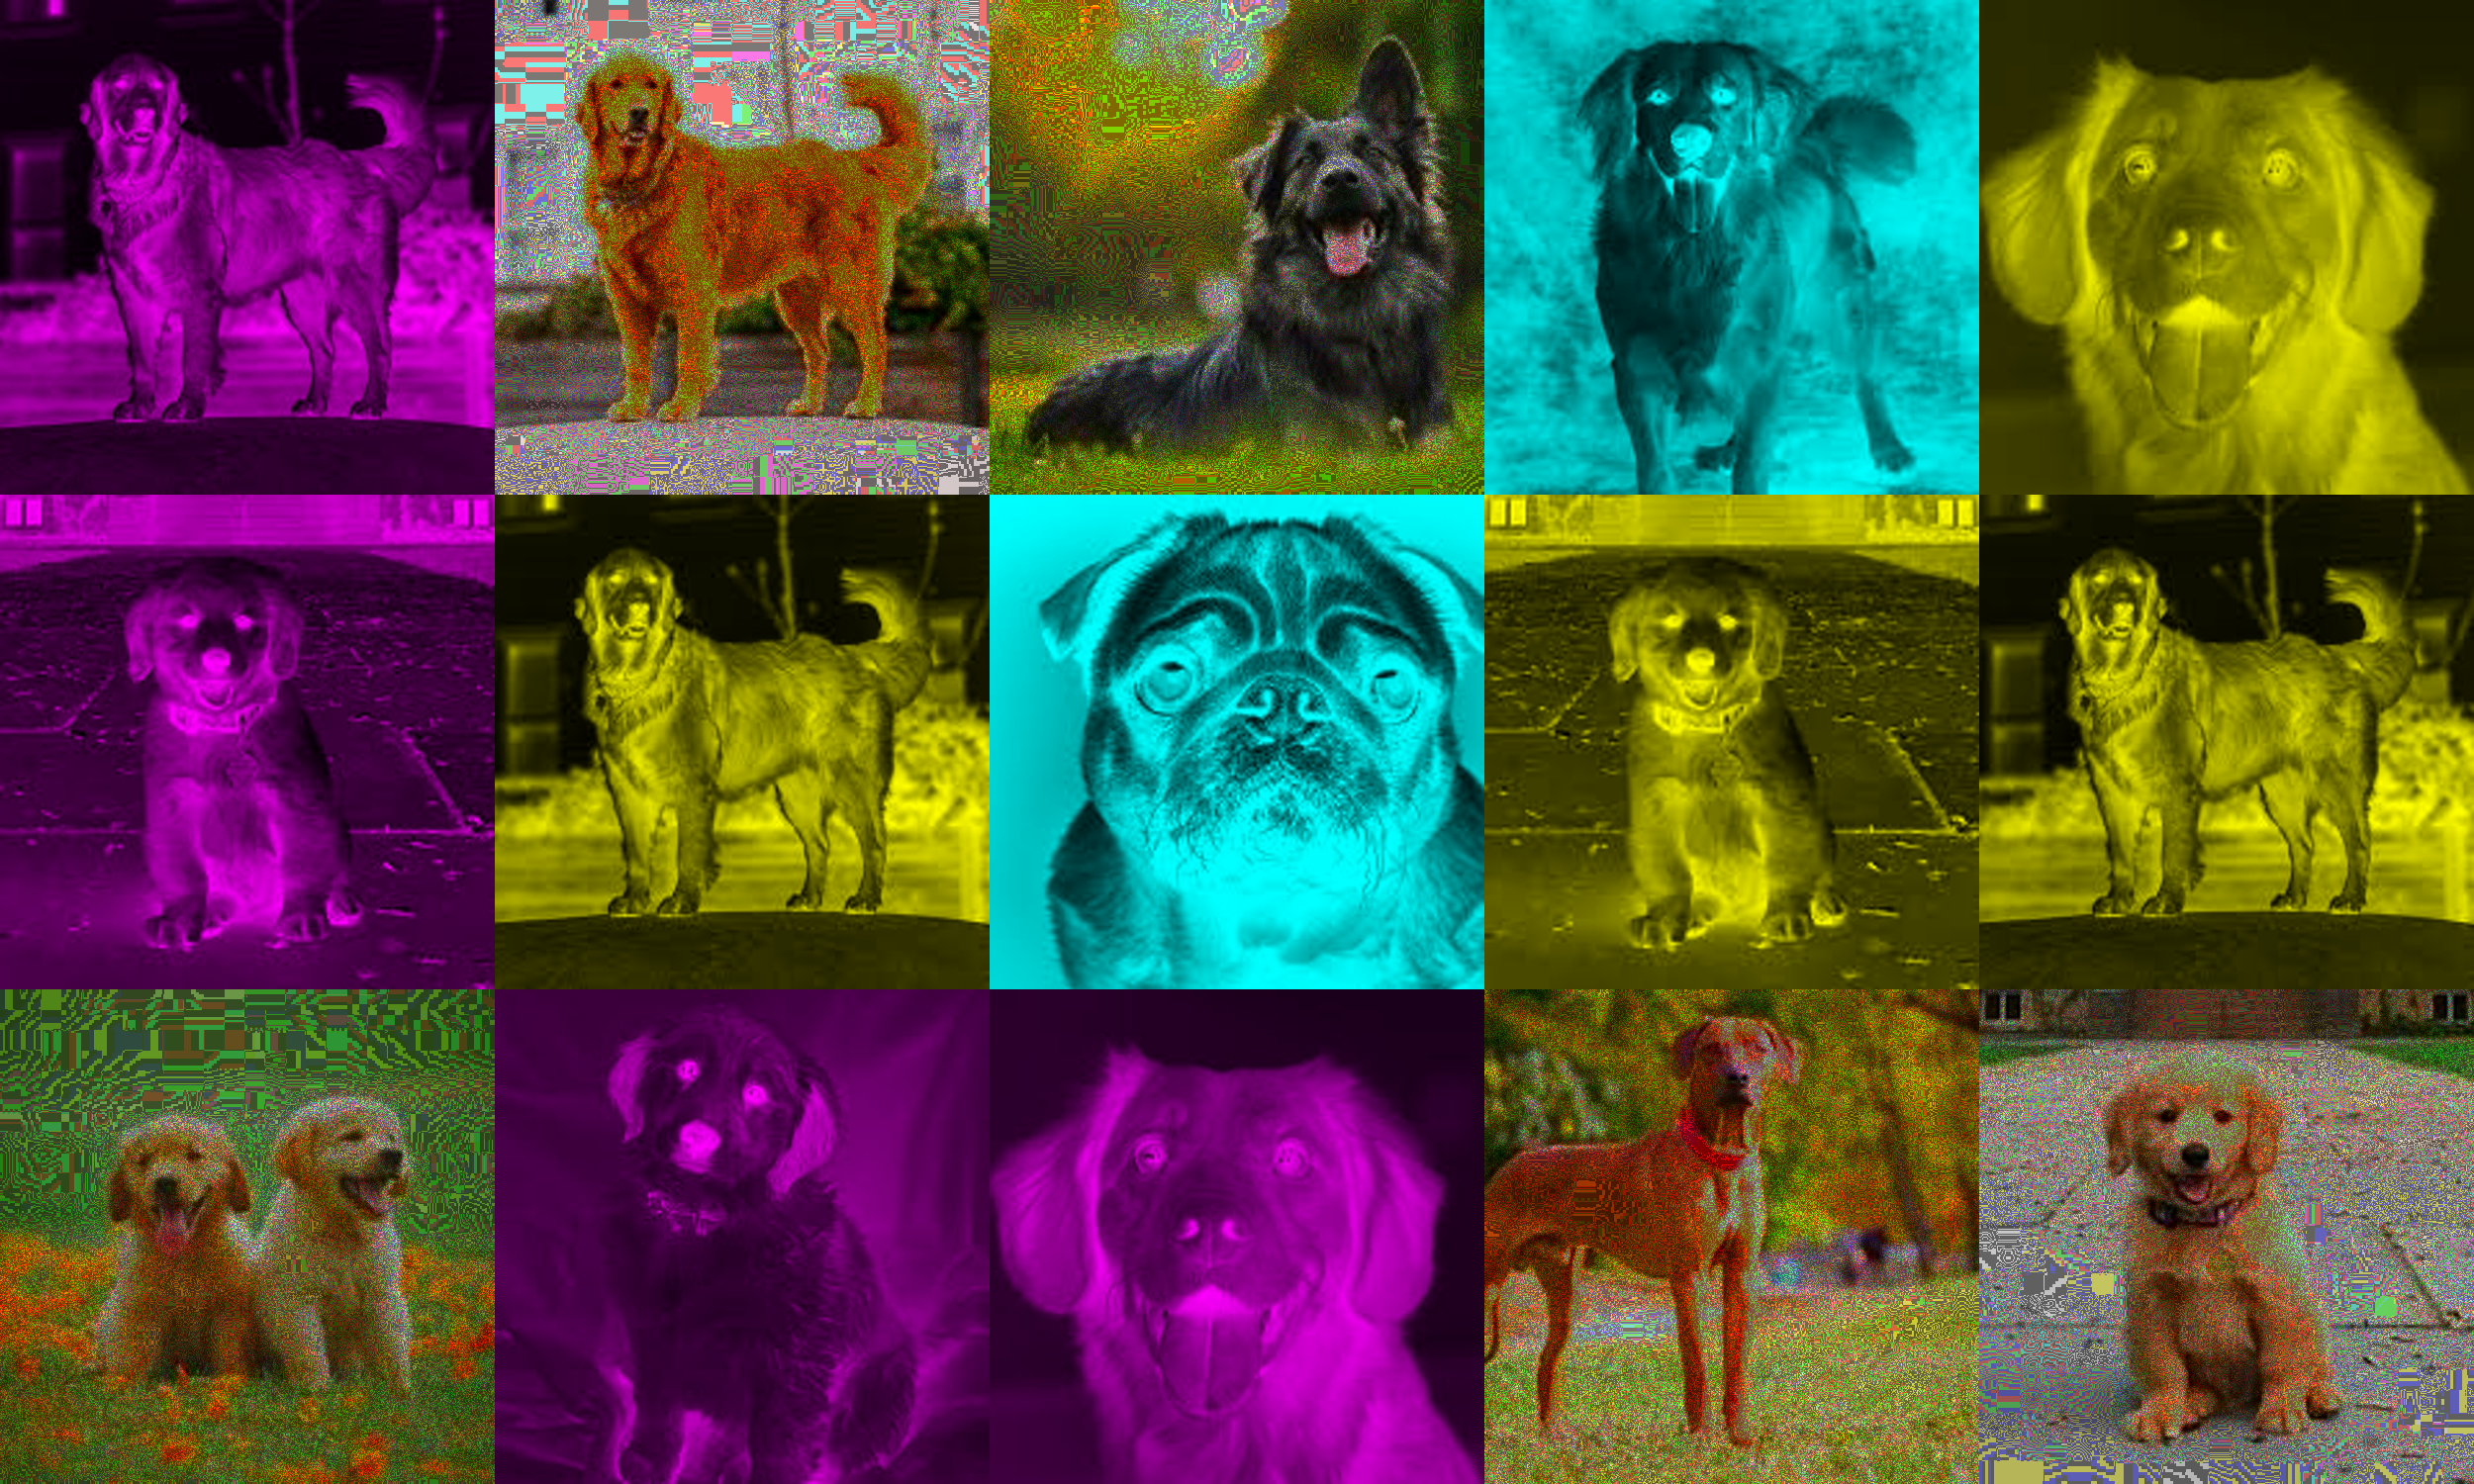

In [6]:
import random
from PIL import ImageEnhance, ImageOps
image_formats = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')
from IPython.display import display, HTML

def crop_and_resize(image, size):
    width, height = image.size
    new_side = min(width, height)
    left = (width - new_side) / 2
    top = (height - new_side) / 2
    cropped_image = image.crop((left, top, left + new_side, top + new_side))
    return cropped_image.resize((size, size))

def apply_random_filter(image):
    filters = ["red", "green", "blue", "yellow", "cyan", "magenta"]
    color = random.choice(filters)
    if color == "red":
        return ImageEnhance.Color(image).enhance(2).point(lambda i: i * (1 if i % 3 == 0 else 0.5))
    elif color == "green":
        return ImageEnhance.Color(image).enhance(2).point(lambda i: i * (1 if i % 3 == 1 else 0.5))
    elif color == "blue":
        return ImageEnhance.Color(image).enhance(2).point(lambda i: i * (1 if i % 3 == 2 else 0.5))
    elif color == "yellow":
        return ImageOps.colorize(image.convert("L"), "yellow", "black")
    elif color == "cyan":
        return ImageOps.colorize(image.convert("L"), "cyan", "black")
    elif color == "magenta":
        return ImageOps.colorize(image.convert("L"), "magenta", "black")
    return image


def create_poster(folder_path, output_name, rows, cols):
    image_paths = [f for f in glob.glob(os.path.join(folder_path, "*")) if f.lower().endswith(image_formats)]
    poster_images = random.choices(image_paths, k=rows * cols)
    square_size = 500
    poster_width = cols * square_size
    poster_height = rows * square_size
    poster = Image.new("RGB", (poster_width, poster_height))

    for i, image_path in enumerate(poster_images):
        with Image.open(image_path) as img:
            img = crop_and_resize(img, square_size)
            img = apply_random_filter(img)
            x = (i % cols) * square_size
            y = (i // cols) * square_size
            poster.paste(img, (x, y))
    
    # display(poster)
    return poster



create_poster("Images", "poster_example1.jpg", rows=3, cols=5)